<h1 style='color:red' align='center'>Predicting Home Prices</h1>

<h1 style='color:blue' align='left'>Look at the Big Picture</h1>

The goal of this project is to use the given data, with many independent variables such as bedrooms, floors, square feet of living area, year built e.t.c to predict house prices.

<h2 style='color:black' align='left'>Frame the Problem</h2>

What is the project objective? How does the client intend to use the benefit from this model? The client intends to use the model in making investment decisions.is it supervised, unsupervised, or
Reinforcement Learning? Is it a classification task, a regression task, or
something else? Should you use batch learning or online learning techniques? It is supervised learning, a multiple regression task and we will be using batch learning.

<h2 style='color:black' align='left'>Select a Performance Measure</h2>

I will be using the Root Mean Square Error(RMSE) and Cross Validation as the performance measure.

<h2 style='color:black' align='left'>Check the Assumptions</h2>

I assume that the numerical output from this model will be used as such, and that whatever system the model is fed into will not require a categorical input. 

<h1 style='color:blue' align='left'>Get the Data</h1>

<h2 style='color:black' align='left'>Load Data</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

ROOT_DIR = os.getcwd()
DATA = 'kc_house_data.csv'

def load_data(data=ROOT_DIR):
    file_path = os.path.join(data, 'kc_house_data.csv')
    load_file = pd.read_csv(file_path)
    return load_file
housing = load_data()

<h2 style='color:black' align='left'>Take a Quick Look at the Data Structure</h2>

In [3]:
housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Lets get a quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Lets find out how many unique categories exist in the 'date' column 
housing['date'].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150524T000000      1
20150110T000000      1
20150131T000000      1
20140727T000000      1
20141130T000000      1
Name: date, Length: 372, dtype: int64

In [6]:
# Lets find out how unique the 'id' column is
housing['id'].value_counts()

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64

In [7]:
# Lets see summary of numerical attributes
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# lets add a 'new_date' column from the 'date' column, to enable us know the most current year
housing['new_date'] = housing['date'].apply(lambda x:x.split('T')[0][:4])
housing['new_date'].unique()

array(['2014', '2015'], dtype=object)

In [9]:
# Lets add an 'age' column
housing['age'] = housing['yr_built'].apply(lambda x:2015-x)

In [10]:
# Convert 'zipcode' column to categorical variable
housing['zipcode'] = housing['zipcode'].map(str)

In [11]:
housing.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_date,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,60
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,64


In [12]:
# Drop less relevant features
housing_new = housing.drop(['id','date','yr_built','new_date','yr_renovated','sqft_lot','sqft_living',
                           'sqft_lot15','view','sqft_basement'], axis=1)

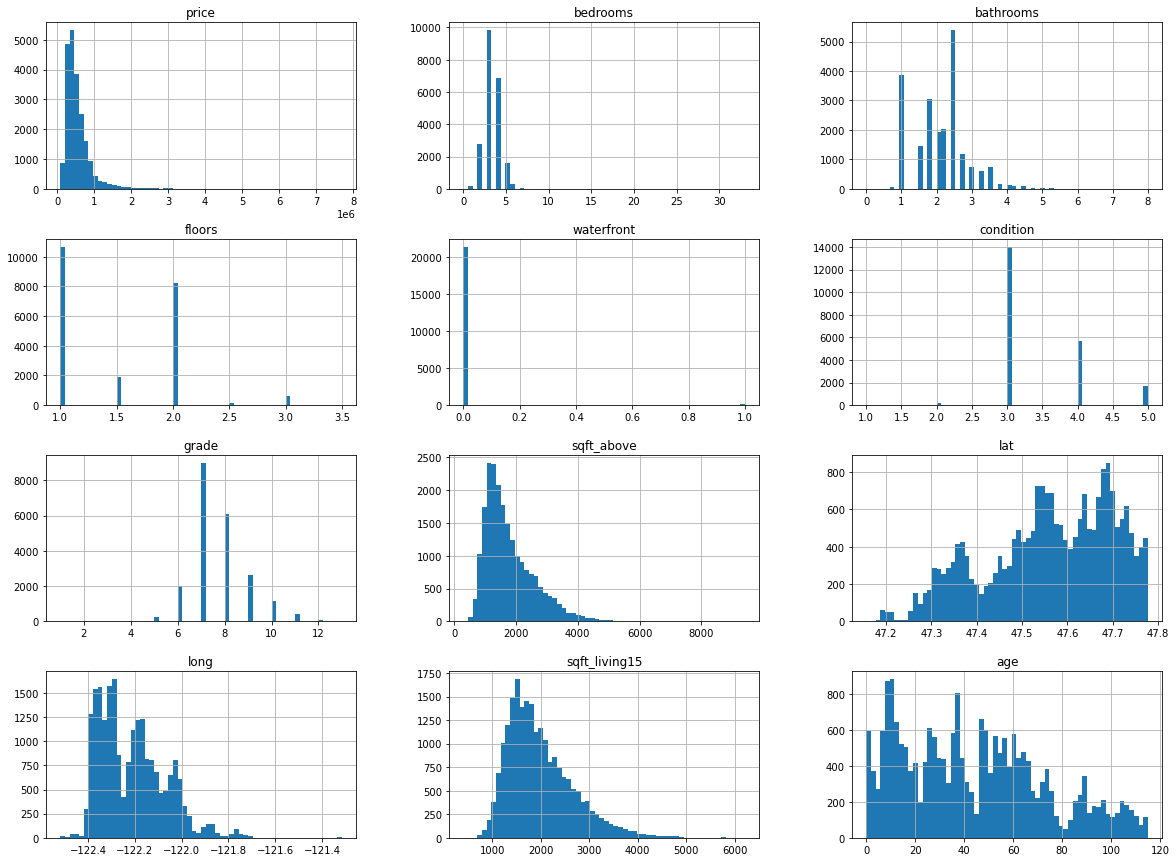

In [13]:
# Get a feel of type of data and distribution
housing_new.hist(bins=60,figsize=(20,15))
plt.show()

<h2 style='color:black' align='left'>Create a Test Set</h2>

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_new, test_size=0.2, random_state=42)

In [15]:
# Lets look for correlation between features and target
corr_matrix = housing_new.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
condition        0.036362
long             0.021626
age             -0.054012
Name: price, dtype: float64

**You may want to ensure that the test set is representative of the various categories highly correlated feature of sqft_above in the whole dataset.**

<AxesSubplot:>

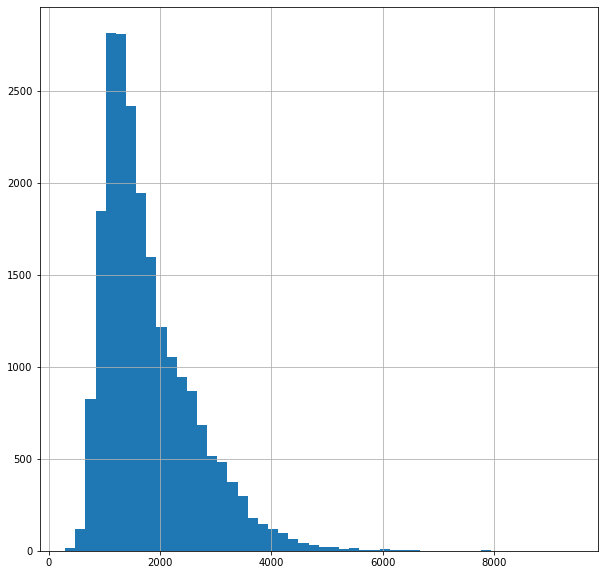

In [16]:
# Lets see the value cluster for 'sqft_above'
housing_new['sqft_above'].hist(bins=50,figsize=(10,10))

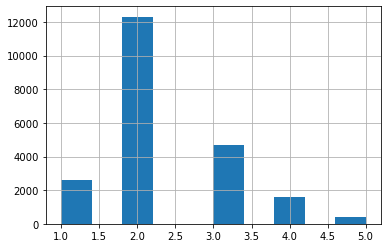

In [17]:
housing_new['sqft_above_cat'] = pd.cut(housing_new['sqft_above'],bins=[0,1000,2000,3000,4000,np.inf],labels=[1,2,3,4,5])
housing_new['sqft_above_cat'].hist()
plt.show()

In [18]:
# Now we are ready to do stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_new, housing_new['sqft_above_cat']):
    strat_train_set = housing_new.loc[train_index]
    strat_test_set = housing_new.loc[test_index]
    

In [19]:
# Lets check proportion for the sqft_above_cat
housing_new['sqft_above_cat'].value_counts()/len(housing_new['sqft_above_cat']) * 100

2    56.951835
3    21.769306
1    12.002036
4     7.370564
5     1.906260
Name: sqft_above_cat, dtype: float64

**Let's compare the sqft_above category proportions in the overall
dataset, in the test set generated with stratified sampling, and in a test set
generated using purely random sampling.**

In [20]:
def sqft_above_cat_proportions(housing_new):
    return housing_new['sqft_above_cat'].value_counts()/len(housing_new['sqft_above_cat']) 

train_set, test_set = train_test_split(housing_new, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    'Overall':sqft_above_cat_proportions(housing_new),
    'Stratified':sqft_above_cat_proportions(strat_test_set),
    'Random':sqft_above_cat_proportions(test_set),
}).sort_index()

compare_props['Rand.%error'] = 100 * compare_props['Random']/compare_props['Overall'] - 100
compare_props['Strat.%error'] = 100 * compare_props['Stratified']/compare_props['Overall'] - 100

In [21]:
# Evaluate both approaches
compare_props

,Overall,Stratified,Random,Rand.%error,Strat.%error
1,0.120020,0.120056,0.117511,-2.090787,0.029294
2,0.569518,0.569512,0.564192,-0.935319,-0.001129
3,0.217693,0.217673,0.222531,2.222209,-0.009253
4,0.073706,0.073791,0.074948,1.685506,0.116285
5,0.019063,0.018968,0.020819,9.213195,-0.494645


**As you can see, the test set generated
using stratified sampling has sqft_above category proportions almost identical to
those in the full dataset, whereas the test set generated using purely random
sampling is skewed.**

In [22]:
# You can remove the 'sqft_above_cat' category to restore the data to its former state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('sqft_above_cat', axis=1, inplace=True)

In [23]:
strat_train_set.head(2)

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,age
2738,397000.0,4,2.50,2.0,0,3,8,2201,98198,47.4002,-122.317,1990,9
1624,750000.0,3,2.75,2.0,0,3,10,3010,98045,47.4881,-121.721,1580,14


<h1 style='color:blue' align='left'>Discover and Visualize the Data to Gain Insights</h1>

In [24]:
# Put the test set aside and lets create a new set to play with
housing2 = strat_train_set.copy()

<h2 style='color:black' align='left' >Visualizing Geographical Data</h2>

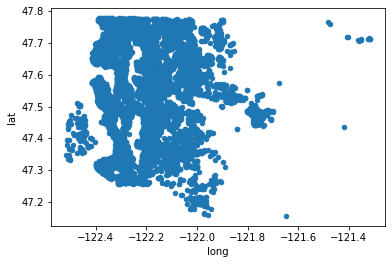

In [25]:
housing2.plot(kind='scatter',x='long', y='lat')
plt.show()

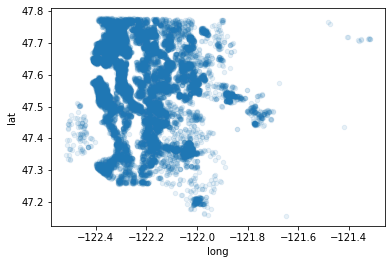

In [26]:
#Show high density areas
housing2.plot(kind='scatter',x='long',y='lat',alpha=0.1)
plt.show()

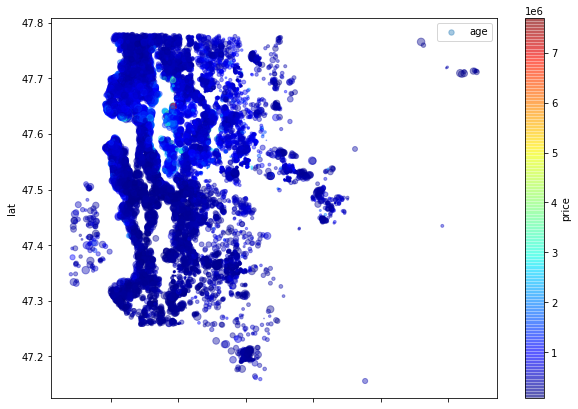

In [27]:
# Lets look at how age affects house price
housing2.plot(kind='scatter', x='long', y='lat', alpha=0.4,
             s=housing2['age']/2, label='age', figsize=(10,7),
             c='price', cmap=plt.get_cmap('jet'),colorbar=True,
             )
plt.legend()
plt.show()

**We can see that most of the houses in the city are not fairly new buildings, and that high priced houses are in the high density area of the Northern part of the city. But there is no insight of correlation between age and price of house.**

<h2 style='color:black' align='left'>Looking for Correlations</h2>

In [28]:
# Using a correlation to see features that are highly correlated to the target(here, price)
import seaborn as sns

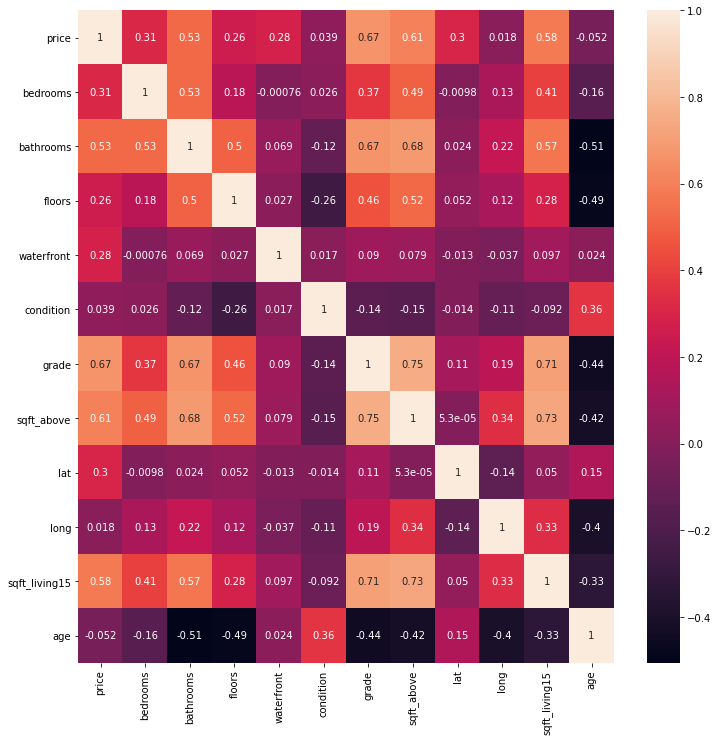

In [29]:
cor = housing2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True)
plt.show()

**The most promising attribute to predict the house price is the grade, but sqft_above has better data spread so let’s zoom in on their correlation scatterplot**

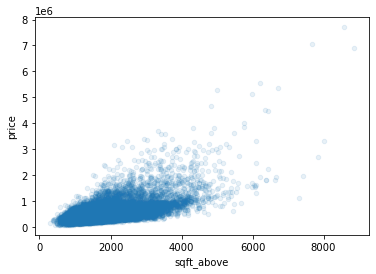

In [30]:
housing2.plot(kind='scatter',x='sqft_above', y='price',alpha=0.1)
plt.show()

**We can see that the correlation is strong ,we can see the upward trend and the points are not too dispersed, and there are no data quirks.**

<h2 style='color:black' align='left'>Experimenting with Attribute Combinations</h2>

In [31]:
housing2['bedrooms_per_sqft'] = housing2['bedrooms']/housing2['sqft_living15']
housing2['bathrooms_per_bedrooms'] = housing2['bathrooms']/housing2['bedrooms']

In [32]:
corr_matrix = housing2.corr()
corr_matrix['price'].sort_values(ascending=False)

price                     1.000000
grade                     0.665165
sqft_above                0.605568
sqft_living15             0.578036
bathrooms                 0.526798
bedrooms                  0.314525
lat                       0.303881
waterfront                0.282560
bathrooms_per_bedrooms    0.279289
floors                    0.258884
condition                 0.039352
long                      0.017742
age                      -0.051891
bedrooms_per_sqft        -0.243352
Name: price, dtype: float64

Price is highly correlated with price_per_sqft

<h1 style='color:blue' align='left'>Prepare the Data for Machine Learning Algorithms</h1>

In [33]:
# let’s revert to a clean training set and also separate the predictors and the labels
housing2 = strat_train_set.drop('price',axis=1)    #drop() creates a copy and does not affect 'dataframe'
housing2_label = strat_train_set['price'].copy()

In [34]:
# Rearrange some columns('bedrooms', 'bathrooms', 'sqft_living15'), to come first.
housing2.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'age'],
      dtype='object')

In [35]:
column_names = ['bedrooms', 'bathrooms', 'sqft_living15', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'age']
housing2= housing2.reindex(columns=column_names)

<h2 style='color:black' align='left'>Data Cleaning</h2>

In [36]:
# create a copy of numerical features
housing2_num = housing2.drop('zipcode',axis=1)

<h2 style='color:black' align='left'>Handling Text and Categorical Attributes</h2>

In [37]:
housing2_cat = housing2[['zipcode']]
housing2_cat.head(5)


,zipcode
2738,98198
1624,98045
19390,98053
3019,98126
4098,98072


In [38]:
housing2_cat.dtypes

zipcode    object
dtype: object

<h2 style='color:black' align>Custom Transformers</h2>

In [39]:
# For example, here is a small transformer class that adds the combined attributes we discussed earlier
from sklearn.base import BaseEstimator, TransformerMixin

bedrooms, bathrooms, sqft_living = 0, 1, 2

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):   # no *args or **kwargs
        
        return None
    def fit(self,X, y=None):
        return self   # nothing else to do
    def transform(self,X, y=None):
        try:
            bathrooms_per_bedrooms = X[:,bathrooms]/ X[:,bedrooms]
            return np.c_[X,bathrooms_per_bedrooms]
        except ZeroDivisionError:
            print('bathrooms column has zero, cannot divide')
        try:
            bedrooms_per_sqft = X[:,bedrooms] / X[:,sqft_living]
            return np.c_[X, bedrooms_per_sqft]
        except ZeroDivisionError:
            print('sqft_living15 column has zero, cannot divide')

attr_adder = CombinedAttributesAdder() 
housing_extra_attribs = attr_adder.transform(housing2.values)

bathrooms column has zero, cannot divide


<h2 style='color:black' align='black'>Feature Scaling</h2>

<h2 style='color:black' align='left'>Transformation Pipelines</h2>

In [40]:
# Lets create a transformational pipeline for numerical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('attribs_adder', CombinedAttributesAdder()),
])
housing_num_tr = num_pipeline.fit_transform(housing2_num)

In [41]:
housing_num_tr

array([[ 0.69208676,  0.50202704,  0.00821182, ..., -0.72951291,
        -1.19408115,  0.72538165],
       [-0.40683693,  0.82703724, -0.59454837, ...,  3.48466138,
        -1.02394795, -2.03284701],
       [ 0.69208676,  0.50202704, -0.43283222, ...,  1.20080518,
        -1.09200123,  0.72538165],
       ...,
       [ 0.69208676,  0.50202704,  0.1993309 , ...,  0.6917103 ,
        -0.17328199,  0.72538165],
       [ 0.69208676,  0.50202704,  1.37544835, ...,  1.49777719,
        -0.75173484,  0.72538165],
       [-0.40683693, -0.47300357,  0.37574852, ..., -1.11840483,
         0.40517087,  1.16263675]])

**It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.**

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing2_num)
cat_attribs = ['zipcode']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(categories='auto',sparse=False), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing2)

<h1 style='color:blue' align='left'>Select and Train a Model</h1>

<h2 style='color:black align='left>Training and Evaluating on the Training Set</h2>

In [105]:
# Separate the test target and transform the test inputs
x_test = strat_test_set.drop('price',axis=1)
y_test = strat_test_set['price'].copy()
x_test_prepared = full_pipeline.transform(x_test)

C:\Users\ALEX\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


<h3 style='color:black' align='left'>Random Forest</h3>

In [43]:
# Train a random forest regressor
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing2_label)

RandomForestRegressor(random_state=42)

In [44]:
# evaluate with training set
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing2_label, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

49875.22479927024

In [50]:
# Evaluate on cross validation set
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing2_label,
                                   scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)

In [51]:
# Let’s look at the results
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [141922.81896736 134058.81250417 143011.05918025]
Mean: 139664.23021725952
Standard deviation: 3988.449781882932


<h3 style='color:black' align='left'>XGBoost</h3>

In [103]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#Evaluate training set error
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=14, subsample=0.9,
                   colsample_bytree=0.4, gamma=1 )
eval_set = [(housing_prepared, housing2_label)]
xgb.fit(housing_prepared, housing2_label, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:595956.31250
[1]	validation_0-rmse:547962.06250
[2]	validation_0-rmse:499310.78125
[3]	validation_0-rmse:457301.09375
[4]	validation_0-rmse:419432.46875
[5]	validation_0-rmse:384632.87500
[6]	validation_0-rmse:355621.28125
[7]	validation_0-rmse:328731.53125
[8]	validation_0-rmse:303754.00000
[9]	validation_0-rmse:281304.59375
[10]	validation_0-rmse:260785.03125
[11]	validation_0-rmse:242071.48438
[12]	validation_0-rmse:223352.10938
[13]	validation_0-rmse:207320.34375
[14]	validation_0-rmse:193019.21875
[15]	validation_0-rmse:179827.00000
[16]	validation_0-rmse:168906.01562
[17]	validation_0-rmse:158077.60938
[18]	validation_0-rmse:147162.34375
[19]	validation_0-rmse:138013.95312
[20]	validation_0-rmse:131796.04688
[21]	validation_0-rmse:126012.21875
[22]	validation_0-rmse:118819.57031
[23]	validation_0-rmse:112487.07812
[24]	validation_0-rmse:105590.62500
[25]	validation_0-rmse:99607.92188
[26]	validation_0-rmse:94517.65625
[27]	validation_0-rmse:90488.13281
[28]	

[230]	validation_0-rmse:13668.20019
[231]	validation_0-rmse:13625.69141
[232]	validation_0-rmse:13560.89941
[233]	validation_0-rmse:13529.96289
[234]	validation_0-rmse:13479.12598
[235]	validation_0-rmse:13430.99219
[236]	validation_0-rmse:13371.22852
[237]	validation_0-rmse:13332.16406
[238]	validation_0-rmse:13265.92578
[239]	validation_0-rmse:13232.66309
[240]	validation_0-rmse:13188.55078
[241]	validation_0-rmse:13122.97070
[242]	validation_0-rmse:13099.56348
[243]	validation_0-rmse:13067.55273
[244]	validation_0-rmse:12990.14844
[245]	validation_0-rmse:12932.08984
[246]	validation_0-rmse:12901.76758
[247]	validation_0-rmse:12879.28125
[248]	validation_0-rmse:12832.52734
[249]	validation_0-rmse:12761.64160
[250]	validation_0-rmse:12761.05762
[251]	validation_0-rmse:12746.20703
[252]	validation_0-rmse:12727.02832
[253]	validation_0-rmse:12718.41797
[254]	validation_0-rmse:12673.68652
[255]	validation_0-rmse:12604.04004
[256]	validation_0-rmse:12602.63672
[257]	validation_0-rmse:1258

[460]	validation_0-rmse:9735.88086
[461]	validation_0-rmse:9731.13867
[462]	validation_0-rmse:9727.98828
[463]	validation_0-rmse:9723.34961
[464]	validation_0-rmse:9722.98633
[465]	validation_0-rmse:9723.22559
[466]	validation_0-rmse:9716.84277
[467]	validation_0-rmse:9716.25098
[468]	validation_0-rmse:9710.28516
[469]	validation_0-rmse:9709.76269
[470]	validation_0-rmse:9709.71484
[471]	validation_0-rmse:9705.35742
[472]	validation_0-rmse:9696.63574
[473]	validation_0-rmse:9694.14941
[474]	validation_0-rmse:9690.85840
[475]	validation_0-rmse:9690.22266
[476]	validation_0-rmse:9683.61914
[477]	validation_0-rmse:9680.62207
[478]	validation_0-rmse:9674.23633
[479]	validation_0-rmse:9671.67383
[480]	validation_0-rmse:9670.13965
[481]	validation_0-rmse:9665.47266
[482]	validation_0-rmse:9662.55762
[483]	validation_0-rmse:9657.16113
[484]	validation_0-rmse:9655.53516
[485]	validation_0-rmse:9654.55273
[486]	validation_0-rmse:9652.24805
[487]	validation_0-rmse:9651.16406
[488]	validation_0-r

[695]	validation_0-rmse:9338.73242
[696]	validation_0-rmse:9342.62695
[697]	validation_0-rmse:9339.85254
[698]	validation_0-rmse:9335.78027
[699]	validation_0-rmse:9335.81641
[700]	validation_0-rmse:9335.80176
[701]	validation_0-rmse:9336.97852
[702]	validation_0-rmse:9336.31250
[703]	validation_0-rmse:9335.83984
[704]	validation_0-rmse:9334.23731
[705]	validation_0-rmse:9335.95606
[706]	validation_0-rmse:9335.03906
[707]	validation_0-rmse:9331.77148
[708]	validation_0-rmse:9331.93652
[709]	validation_0-rmse:9329.22656
[710]	validation_0-rmse:9327.93457
[711]	validation_0-rmse:9326.44629
[712]	validation_0-rmse:9325.51953
[713]	validation_0-rmse:9326.12695
[714]	validation_0-rmse:9322.86328
[715]	validation_0-rmse:9321.46777
[716]	validation_0-rmse:9321.20117
[717]	validation_0-rmse:9320.57812
[718]	validation_0-rmse:9323.87598
[719]	validation_0-rmse:9322.63574
[720]	validation_0-rmse:9322.09570
[721]	validation_0-rmse:9322.29297
[722]	validation_0-rmse:9322.92188
[723]	validation_0-r

[930]	validation_0-rmse:9256.35938
[931]	validation_0-rmse:9255.81055
[932]	validation_0-rmse:9257.12305
[933]	validation_0-rmse:9256.35742
[934]	validation_0-rmse:9254.48144
[935]	validation_0-rmse:9254.56836
[936]	validation_0-rmse:9254.59863
[937]	validation_0-rmse:9253.89258
[938]	validation_0-rmse:9253.99316
[939]	validation_0-rmse:9253.61328
[940]	validation_0-rmse:9252.22656
[941]	validation_0-rmse:9251.21094
[942]	validation_0-rmse:9252.75684
[943]	validation_0-rmse:9256.62695
[944]	validation_0-rmse:9256.26367
[945]	validation_0-rmse:9260.35352
[946]	validation_0-rmse:9259.18652
[947]	validation_0-rmse:9258.95996
[948]	validation_0-rmse:9259.64941
[949]	validation_0-rmse:9260.44043
[950]	validation_0-rmse:9258.73535
[951]	validation_0-rmse:9259.24707
[952]	validation_0-rmse:9258.38184
[953]	validation_0-rmse:9259.63672
[954]	validation_0-rmse:9258.04688
[955]	validation_0-rmse:9256.40820
[956]	validation_0-rmse:9255.97363
[957]	validation_0-rmse:9255.56152
[958]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=14,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
#Evaluate test set error
eval_set = [(x_test_prepared, y_test)]
xgb.fit(housing_prepared, housing2_label, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:588497.68750
[1]	validation_0-rmse:542402.06250
[2]	validation_0-rmse:496258.84375
[3]	validation_0-rmse:454816.84375
[4]	validation_0-rmse:419600.75000
[5]	validation_0-rmse:387038.71875
[6]	validation_0-rmse:360258.09375
[7]	validation_0-rmse:334215.56250
[8]	validation_0-rmse:310366.87500
[9]	validation_0-rmse:290028.12500
[10]	validation_0-rmse:272439.00000
[11]	validation_0-rmse:256901.87500
[12]	validation_0-rmse:241219.53125
[13]	validation_0-rmse:227949.68750
[14]	validation_0-rmse:216767.48438
[15]	validation_0-rmse:206699.29688
[16]	validation_0-rmse:198678.82812
[17]	validation_0-rmse:190947.68750
[18]	validation_0-rmse:182888.98438
[19]	validation_0-rmse:177389.81250
[20]	validation_0-rmse:172775.57812
[21]	validation_0-rmse:169230.59375
[22]	validation_0-rmse:165259.95312
[23]	validation_0-rmse:161652.98438
[24]	validation_0-rmse:158061.87500
[25]	validation_0-rmse:154944.34375
[26]	validation_0-rmse:152189.75000
[27]	validation_0-rmse:150348.26562
[2

[225]	validation_0-rmse:134255.17188
[226]	validation_0-rmse:134259.45312
[227]	validation_0-rmse:134264.21875
[228]	validation_0-rmse:134262.68750
[229]	validation_0-rmse:134262.53125
[230]	validation_0-rmse:134263.59375
[231]	validation_0-rmse:134261.21875
[232]	validation_0-rmse:134263.14062
[233]	validation_0-rmse:134265.06250
[234]	validation_0-rmse:134272.76562
[235]	validation_0-rmse:134272.25000
[236]	validation_0-rmse:134278.23438
[237]	validation_0-rmse:134281.73438
[238]	validation_0-rmse:134281.54688
[239]	validation_0-rmse:134286.92188
[240]	validation_0-rmse:134279.48438
[241]	validation_0-rmse:134278.68750
[242]	validation_0-rmse:134277.29688
[243]	validation_0-rmse:134277.31250
[244]	validation_0-rmse:134278.53125
[245]	validation_0-rmse:134283.98438
[246]	validation_0-rmse:134283.56250
[247]	validation_0-rmse:134280.45312
[248]	validation_0-rmse:134282.90625
[249]	validation_0-rmse:134288.70312
[250]	validation_0-rmse:134287.98438
[251]	validation_0-rmse:134292.14062
[

[447]	validation_0-rmse:134431.25000
[448]	validation_0-rmse:134429.18750
[449]	validation_0-rmse:134430.90625
[450]	validation_0-rmse:134431.84375
[451]	validation_0-rmse:134433.53125
[452]	validation_0-rmse:134431.34375
[453]	validation_0-rmse:134428.37500
[454]	validation_0-rmse:134428.10938
[455]	validation_0-rmse:134432.54688
[456]	validation_0-rmse:134435.89062
[457]	validation_0-rmse:134437.56250
[458]	validation_0-rmse:134438.09375
[459]	validation_0-rmse:134436.96875
[460]	validation_0-rmse:134436.68750
[461]	validation_0-rmse:134436.00000
[462]	validation_0-rmse:134434.21875
[463]	validation_0-rmse:134434.70312
[464]	validation_0-rmse:134434.89062
[465]	validation_0-rmse:134435.45312
[466]	validation_0-rmse:134438.01562
[467]	validation_0-rmse:134437.04688
[468]	validation_0-rmse:134437.31250
[469]	validation_0-rmse:134437.00000
[470]	validation_0-rmse:134434.87500
[471]	validation_0-rmse:134436.79688
[472]	validation_0-rmse:134437.95312
[473]	validation_0-rmse:134435.15625
[

[669]	validation_0-rmse:134464.32812
[670]	validation_0-rmse:134464.32812
[671]	validation_0-rmse:134463.70312
[672]	validation_0-rmse:134463.70312
[673]	validation_0-rmse:134469.51562
[674]	validation_0-rmse:134470.54688
[675]	validation_0-rmse:134472.62500
[676]	validation_0-rmse:134473.03125
[677]	validation_0-rmse:134472.25000
[678]	validation_0-rmse:134476.18750
[679]	validation_0-rmse:134476.06250
[680]	validation_0-rmse:134474.28125
[681]	validation_0-rmse:134473.03125
[682]	validation_0-rmse:134469.87500
[683]	validation_0-rmse:134468.85938
[684]	validation_0-rmse:134468.73438
[685]	validation_0-rmse:134465.10938
[686]	validation_0-rmse:134467.51562
[687]	validation_0-rmse:134468.14062
[688]	validation_0-rmse:134465.67188
[689]	validation_0-rmse:134466.96875
[690]	validation_0-rmse:134465.25000
[691]	validation_0-rmse:134463.54688
[692]	validation_0-rmse:134464.35938
[693]	validation_0-rmse:134465.21875
[694]	validation_0-rmse:134464.73438
[695]	validation_0-rmse:134466.64062
[

[891]	validation_0-rmse:134523.75000
[892]	validation_0-rmse:134521.89062
[893]	validation_0-rmse:134521.37500
[894]	validation_0-rmse:134521.46875
[895]	validation_0-rmse:134521.45312
[896]	validation_0-rmse:134518.81250
[897]	validation_0-rmse:134517.89062
[898]	validation_0-rmse:134519.25000
[899]	validation_0-rmse:134519.85938
[900]	validation_0-rmse:134520.93750
[901]	validation_0-rmse:134522.00000
[902]	validation_0-rmse:134522.50000
[903]	validation_0-rmse:134523.32812
[904]	validation_0-rmse:134518.98438
[905]	validation_0-rmse:134518.39062
[906]	validation_0-rmse:134517.65625
[907]	validation_0-rmse:134518.42188
[908]	validation_0-rmse:134517.96875
[909]	validation_0-rmse:134517.59375
[910]	validation_0-rmse:134516.32812
[911]	validation_0-rmse:134515.51562
[912]	validation_0-rmse:134515.78125
[913]	validation_0-rmse:134516.09375
[914]	validation_0-rmse:134519.37500
[915]	validation_0-rmse:134519.62500
[916]	validation_0-rmse:134520.98438
[917]	validation_0-rmse:134520.07812
[

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=14,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

<h2 style='color:black' align='left'>Learning Curves</h2>

In [113]:
# plot learning curve
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = xgb
eval_set = [(housing_prepared, housing2_label), (x_test_prepared, y_test)]
model.fit(housing_prepared, housing2_label, eval_metric=["rmse"], eval_set=eval_set, verbose=True)

# make predictions for test data
predictions = model.predict(x_test_prepared)

# evaluate predictions
Error = mean_squared_error(y_test, predictions)
print("Error: %.2f" % (np.sqrt(Error)))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

[0]	validation_0-rmse:595956.31250	validation_1-rmse:588497.68750
[1]	validation_0-rmse:547962.06250	validation_1-rmse:542402.06250
[2]	validation_0-rmse:499310.78125	validation_1-rmse:496258.84375
[3]	validation_0-rmse:457301.09375	validation_1-rmse:454816.84375
[4]	validation_0-rmse:419432.46875	validation_1-rmse:419600.75000
[5]	validation_0-rmse:384632.87500	validation_1-rmse:387038.71875
[6]	validation_0-rmse:355621.28125	validation_1-rmse:360258.09375
[7]	validation_0-rmse:328731.53125	validation_1-rmse:334215.56250
[8]	validation_0-rmse:303754.00000	validation_1-rmse:310366.87500
[9]	validation_0-rmse:281304.59375	validation_1-rmse:290028.12500
[10]	validation_0-rmse:260785.03125	validation_1-rmse:272439.00000
[11]	validation_0-rmse:242071.48438	validation_1-rmse:256901.87500
[12]	validation_0-rmse:223352.10938	validation_1-rmse:241219.53125
[13]	validation_0-rmse:207320.34375	validation_1-rmse:227949.68750
[14]	validation_0-rmse:193019.21875	validation_1-rmse:216767.48438
[15]	

[124]	validation_0-rmse:23662.04102	validation_1-rmse:134148.20312
[125]	validation_0-rmse:23511.95703	validation_1-rmse:134146.53125
[126]	validation_0-rmse:23392.54102	validation_1-rmse:134149.53125
[127]	validation_0-rmse:23238.52539	validation_1-rmse:134134.26562
[128]	validation_0-rmse:22998.03320	validation_1-rmse:134123.14062
[129]	validation_0-rmse:22936.38281	validation_1-rmse:134120.23438
[130]	validation_0-rmse:22831.07812	validation_1-rmse:134115.35938
[131]	validation_0-rmse:22679.30664	validation_1-rmse:134125.39062
[132]	validation_0-rmse:22284.30859	validation_1-rmse:134107.37500
[133]	validation_0-rmse:22137.50977	validation_1-rmse:134083.43750
[134]	validation_0-rmse:22034.26172	validation_1-rmse:134090.84375
[135]	validation_0-rmse:21869.25586	validation_1-rmse:134079.65625
[136]	validation_0-rmse:21809.25586	validation_1-rmse:134086.12500
[137]	validation_0-rmse:21688.32227	validation_1-rmse:134087.95312
[138]	validation_0-rmse:21480.97656	validation_1-rmse:134077.5

[247]	validation_0-rmse:12879.28125	validation_1-rmse:134280.45312
[248]	validation_0-rmse:12832.52734	validation_1-rmse:134282.90625
[249]	validation_0-rmse:12761.64160	validation_1-rmse:134288.70312
[250]	validation_0-rmse:12761.05762	validation_1-rmse:134287.98438
[251]	validation_0-rmse:12746.20703	validation_1-rmse:134292.14062
[252]	validation_0-rmse:12727.02832	validation_1-rmse:134292.59375
[253]	validation_0-rmse:12718.41797	validation_1-rmse:134293.85938
[254]	validation_0-rmse:12673.68652	validation_1-rmse:134294.67188
[255]	validation_0-rmse:12604.04004	validation_1-rmse:134292.57812
[256]	validation_0-rmse:12602.63672	validation_1-rmse:134291.43750
[257]	validation_0-rmse:12585.50879	validation_1-rmse:134292.00000
[258]	validation_0-rmse:12523.23242	validation_1-rmse:134285.31250
[259]	validation_0-rmse:12470.49805	validation_1-rmse:134290.92188
[260]	validation_0-rmse:12453.74023	validation_1-rmse:134287.70312
[261]	validation_0-rmse:12440.65820	validation_1-rmse:134289.1

[370]	validation_0-rmse:10283.92676	validation_1-rmse:134424.07812
[371]	validation_0-rmse:10272.93945	validation_1-rmse:134425.40625
[372]	validation_0-rmse:10272.86523	validation_1-rmse:134427.81250
[373]	validation_0-rmse:10259.75488	validation_1-rmse:134431.26562
[374]	validation_0-rmse:10255.70508	validation_1-rmse:134428.78125
[375]	validation_0-rmse:10245.80469	validation_1-rmse:134427.06250
[376]	validation_0-rmse:10230.03516	validation_1-rmse:134425.54688
[377]	validation_0-rmse:10223.19727	validation_1-rmse:134427.92188
[378]	validation_0-rmse:10215.64160	validation_1-rmse:134428.10938
[379]	validation_0-rmse:10206.12109	validation_1-rmse:134430.21875
[380]	validation_0-rmse:10198.39258	validation_1-rmse:134431.65625
[381]	validation_0-rmse:10182.87305	validation_1-rmse:134434.46875
[382]	validation_0-rmse:10165.40723	validation_1-rmse:134438.40625
[383]	validation_0-rmse:10161.52734	validation_1-rmse:134436.35938
[384]	validation_0-rmse:10158.09180	validation_1-rmse:134437.0

[494]	validation_0-rmse:9636.17969	validation_1-rmse:134446.54688
[495]	validation_0-rmse:9630.13574	validation_1-rmse:134450.48438
[496]	validation_0-rmse:9630.16211	validation_1-rmse:134452.57812
[497]	validation_0-rmse:9630.73242	validation_1-rmse:134453.57812
[498]	validation_0-rmse:9628.98633	validation_1-rmse:134453.71875
[499]	validation_0-rmse:9620.50195	validation_1-rmse:134453.18750
[500]	validation_0-rmse:9618.53613	validation_1-rmse:134453.78125
[501]	validation_0-rmse:9618.34570	validation_1-rmse:134453.46875
[502]	validation_0-rmse:9613.95508	validation_1-rmse:134454.15625
[503]	validation_0-rmse:9611.65430	validation_1-rmse:134456.39062
[504]	validation_0-rmse:9609.07519	validation_1-rmse:134458.57812
[505]	validation_0-rmse:9608.34961	validation_1-rmse:134457.48438
[506]	validation_0-rmse:9605.70996	validation_1-rmse:134453.98438
[507]	validation_0-rmse:9601.93066	validation_1-rmse:134456.46875
[508]	validation_0-rmse:9598.50488	validation_1-rmse:134456.23438
[509]	vali

[619]	validation_0-rmse:9401.82129	validation_1-rmse:134435.20312
[620]	validation_0-rmse:9402.63281	validation_1-rmse:134434.43750
[621]	validation_0-rmse:9399.00586	validation_1-rmse:134433.85938
[622]	validation_0-rmse:9398.82715	validation_1-rmse:134438.67188
[623]	validation_0-rmse:9395.76465	validation_1-rmse:134439.35938
[624]	validation_0-rmse:9395.57617	validation_1-rmse:134439.89062
[625]	validation_0-rmse:9395.37402	validation_1-rmse:134440.18750
[626]	validation_0-rmse:9397.12207	validation_1-rmse:134441.43750
[627]	validation_0-rmse:9396.95410	validation_1-rmse:134441.48438
[628]	validation_0-rmse:9392.16309	validation_1-rmse:134441.96875
[629]	validation_0-rmse:9391.45606	validation_1-rmse:134439.15625
[630]	validation_0-rmse:9389.07617	validation_1-rmse:134440.21875
[631]	validation_0-rmse:9386.92090	validation_1-rmse:134441.56250
[632]	validation_0-rmse:9385.41113	validation_1-rmse:134445.40625
[633]	validation_0-rmse:9385.58887	validation_1-rmse:134448.48438
[634]	vali

[744]	validation_0-rmse:9313.43359	validation_1-rmse:134474.34375
[745]	validation_0-rmse:9311.70117	validation_1-rmse:134477.20312
[746]	validation_0-rmse:9311.34375	validation_1-rmse:134476.01562
[747]	validation_0-rmse:9308.88769	validation_1-rmse:134476.46875
[748]	validation_0-rmse:9311.94238	validation_1-rmse:134478.45312
[749]	validation_0-rmse:9312.81250	validation_1-rmse:134479.18750
[750]	validation_0-rmse:9319.09375	validation_1-rmse:134482.12500
[751]	validation_0-rmse:9317.24609	validation_1-rmse:134479.93750
[752]	validation_0-rmse:9310.29785	validation_1-rmse:134481.37500
[753]	validation_0-rmse:9306.69824	validation_1-rmse:134479.60938
[754]	validation_0-rmse:9305.57031	validation_1-rmse:134481.40625
[755]	validation_0-rmse:9306.55371	validation_1-rmse:134482.46875
[756]	validation_0-rmse:9307.17481	validation_1-rmse:134482.89062
[757]	validation_0-rmse:9308.21387	validation_1-rmse:134483.09375
[758]	validation_0-rmse:9310.55371	validation_1-rmse:134483.50000
[759]	vali

[869]	validation_0-rmse:9274.00684	validation_1-rmse:134514.00000
[870]	validation_0-rmse:9270.80078	validation_1-rmse:134520.03125
[871]	validation_0-rmse:9272.16602	validation_1-rmse:134520.29688
[872]	validation_0-rmse:9271.57324	validation_1-rmse:134519.79688
[873]	validation_0-rmse:9270.52637	validation_1-rmse:134518.87500
[874]	validation_0-rmse:9271.11035	validation_1-rmse:134517.75000
[875]	validation_0-rmse:9275.52344	validation_1-rmse:134517.14062
[876]	validation_0-rmse:9274.62695	validation_1-rmse:134517.26562
[877]	validation_0-rmse:9273.75586	validation_1-rmse:134516.40625
[878]	validation_0-rmse:9275.43945	validation_1-rmse:134516.65625
[879]	validation_0-rmse:9272.73535	validation_1-rmse:134517.46875
[880]	validation_0-rmse:9273.93164	validation_1-rmse:134517.54688
[881]	validation_0-rmse:9273.77832	validation_1-rmse:134517.04688
[882]	validation_0-rmse:9271.70312	validation_1-rmse:134517.39062
[883]	validation_0-rmse:9268.31934	validation_1-rmse:134518.82812
[884]	vali

[994]	validation_0-rmse:9248.26856	validation_1-rmse:134494.84375
[995]	validation_0-rmse:9247.66797	validation_1-rmse:134491.75000
[996]	validation_0-rmse:9246.70215	validation_1-rmse:134489.82812
[997]	validation_0-rmse:9248.01074	validation_1-rmse:134490.28125
[998]	validation_0-rmse:9247.74023	validation_1-rmse:134489.46875
[999]	validation_0-rmse:9249.02637	validation_1-rmse:134489.92188
Error: 134489.94


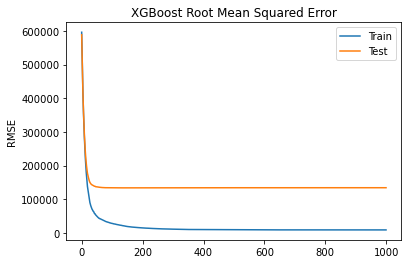

In [129]:
# plot rmse
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost Root Mean Squared Error')
plt.show()

**The test error stopped improving aroung epoch 68. This means that we can focus on fine tuning other parameters to look for improvement.**

In [121]:
# Learning curve of errors against training sizes
from sklearn.model_selection import learning_curve

train_sizes, train_errors, test_errors = learning_curve(xgb, housing_prepared, housing2_label,
                                                      cv=3, scoring="neg_mean_squared_error",
                                                      n_jobs=-1, train_sizes=np.linspace(0.01, 1, 50),
                                                      verbose=1)

[learning_curve] Training set sizes: [  115   348   581   813  1046  1279  1512  1745  1978  2211  2443  2676
  2909  3142  3375  3608  3841  4074  4306  4539  4772  5005  5238  5471
  5704  5937  6169  6402  6635  6868  7101  7334  7567  7800  8032  8265
  8498  8731  8964  9197  9430  9663  9895 10128 10361 10594 10827 11060
 11293 11526]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 19.0min finished


In [123]:
#Train RMSE
train_mean = np.mean(train_errors, axis=1)
train_std = np.std(train_errors, axis=1)
train_RMSE = np.sqrt(-train_mean)

In [124]:
#Test RMSE
test_mean = np.mean(test_errors, axis=1)
test_std = np.std(test_errors, axis=1)
test_RMSE = np.sqrt(-test_mean)

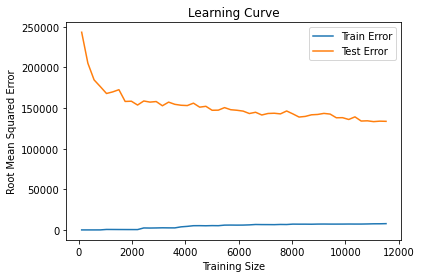

In [130]:
plt.plot(train_sizes, train_RMSE, label= "Train Error")
plt.plot(train_sizes, test_RMSE, label= "Test Error")
plt.title('Learning Curve')
plt.xlabel('Training Size')

plt.ylabel('Root Mean Squared Error')
plt.legend(loc='best')
plt.show()

<h1 style='color:blue' align='left'>Fine-Tune Your Model</h1>

In [178]:
#Fine tuning Parameters on training set
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=9, subsample=0.9,
                   colsample_bytree=0.4, gamma=0 )
eval_set = [(x_test_prepared, y_test)]
xgb.fit(housing_prepared, housing2_label, eval_metric="rmse", eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:588150.81250
[1]	validation_0-rmse:541825.43750
[2]	validation_0-rmse:495871.65625
[3]	validation_0-rmse:454298.37500
[4]	validation_0-rmse:419058.40625
[5]	validation_0-rmse:386121.53125
[6]	validation_0-rmse:359175.59375
[7]	validation_0-rmse:333724.96875
[8]	validation_0-rmse:310170.81250
[9]	validation_0-rmse:289851.40625
[10]	validation_0-rmse:271953.12500
[11]	validation_0-rmse:256114.90625
[12]	validation_0-rmse:240229.73438
[13]	validation_0-rmse:226801.17188
[14]	validation_0-rmse:215160.03125
[15]	validation_0-rmse:204641.85938
[16]	validation_0-rmse:196808.31250
[17]	validation_0-rmse:189103.95312
[18]	validation_0-rmse:180655.60938
[19]	validation_0-rmse:175066.76562
[20]	validation_0-rmse:170779.78125
[21]	validation_0-rmse:167264.26562
[22]	validation_0-rmse:163219.75000
[23]	validation_0-rmse:159919.46875
[24]	validation_0-rmse:155913.45312
[25]	validation_0-rmse:152526.39062
[26]	validation_0-rmse:149606.79688
[27]	validation_0-rmse:147799.87500
[2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

<h2 style='color:black' align='left'>Evaluate Your System on the Test Set</h2>

In [179]:
# Final Prediction
final_predictions = xgb.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse              

128522.38159560217

In [180]:
# compute a 95% confidence interval for the generalization error using scipy.stats.t.interval()
from scipy import stats

confidence = 0.9
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([117050.02625958, 139051.41673008])

**Looking at the Learning Curves, we can see that as the training examples increases the validation error is decreasing. This tells us that getting more training data might help deal with the model overfitting.**